# Image Processing Techniques

## Libraries
---

In [52]:
import os
import cv2
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
np.set_printoptions(threshold=np.inf)
np.set_printoptions(suppress=True)


In [53]:
def display_image(image, image_stage):
    plt.imshow(image, cmap='gray')
    plt.title(image_stage)
    plt.axis('off')
    plt.xticks([])
    plt.yticks([])
    plt.show()
    

## Task 1
---
### 1.a)
*Explain the impact of the following transformation function on a grayscale image, in terms 
of intensity values and brightness.*

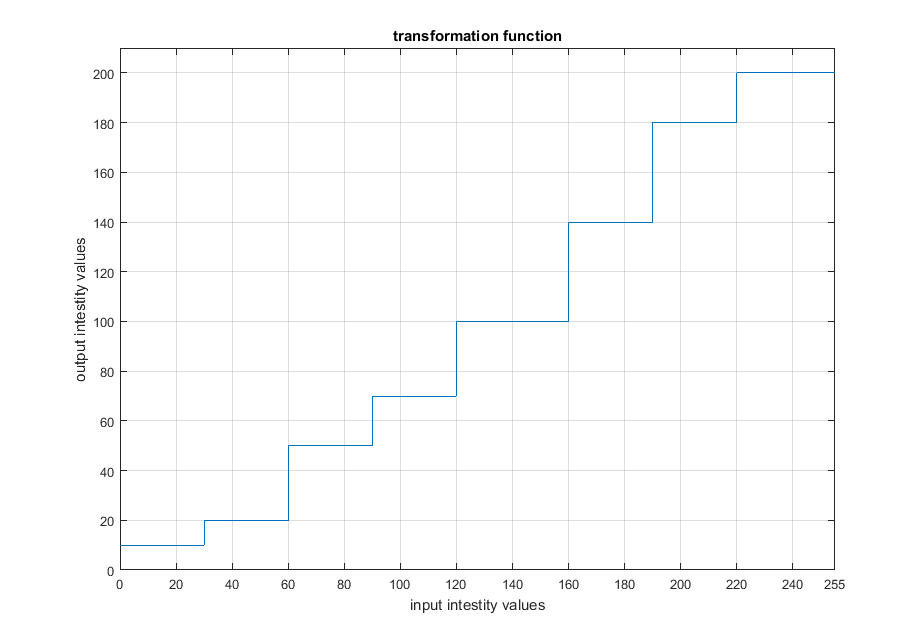

For a grayscale image the intensity value of a pixel lies in the range of [0, 255] corresponding to 256 distinct levels of intensity. A value of intensity equal to 0 corresponds to pure black while intensity equal to 255 corresponds to pure white. The same image compared with pixels of higher intensity values and with pixels of lower intensity values is considered as a brighter image at the first case compared to the second one, although there is no one to one correspondance of intensity value and brightness always. Brightness refers to the human perception of light, it is not a physical quantity and it is a relative term. A bright region of an image does not always have high intensity values and generally corresponds to pixels which have higher intensity values than other neighbouring pixels of the image. So pixels with the same intensity could consist a bright region in an image while in another image could be perceived as not a bright region (even though their intensity values remain the same).

The transformation function takes as input the intensity values of the pixels of an image (x axis) and outputs new intensity values (y axis) for the same pixels, thus "transforming" the image. In this case, it can be seen by the plot of the transformation function that every 30 or 35 or 40 input intensity values (x axis), starting from 0 and ending to 255, correspond to a single specific output intensity value (y axis). So:
1. [0-30) -> 10
2. [30-60) -> 20
3. [60-90) -> 50
4. [90-120) -> 70
5. [120-160) -> 100
6. [160-190) -> 140
7. [190-220) -> 180
8. [220-255] -> 200

It can be seen that in the majority of the cases, with a few exceptions of input intensity values in range of 0-10, the output intensity value is lower than the input intensity value. Therefore, generally, the intensity values of the pixels decrease and consequently the brightness of the image is expected to be decreased after the implementation of the transformation function. At the same time the variety of the input intensity values drastically decreases which means that the output image is expected to be blurrier than the original and with less details as it will only have 8 different values of intensity for its pixels while the original image can possibly have up to 256 different values of intensity for its pixels.

### 1.b)
*Verify by applying the transformation on an image of choice (including 
input/output images)*

In [54]:
def transformation_function(intensity):
    if 0 <= intensity < 30:
        new_intensity = 10
    elif 30 <= intensity < 60:
        new_intensity = 20
    elif 60 <= intensity < 90:
        new_intensity = 50
    elif 90 <= intensity < 120:
        new_intensity = 70
    elif 120 <= intensity < 160:
        new_intensity = 100
    elif 160 <= intensity < 190:
        new_intensity = 140
    elif 190 <= intensity < 220:
        new_intensity = 180
    elif 220 <= intensity <= 255:
        new_intensity = 200
    return new_intensity


def convert_image():
    image = cv2.imread('test_image.jpg', 0)
    image_rows = image.shape[0]
    image_columns = image.shape[1]
    print("The shape of the input image is " + str(image_rows) + " x " + str(image_columns) + " pixels.")

    display_image(image, "Input Image")

    new_image = np.zeros([image.shape[0], image.shape[1]])
    for row in range(image_rows):
        for column in range(image_columns):
            input_intensity = image[row][column]
            output_intensity = transformation_function(input_intensity)
            new_image[row][column] = output_intensity

    new_image_rows = new_image.shape[0]
    new_image_columns = new_image.shape[1]
    print("The shape of the output image is " + str(new_image_rows) + " x " + str(new_image_columns) + " pixels.")
    
    display_image(new_image, "Output Image")


The shape of the input image is 183 x 275 pixels.


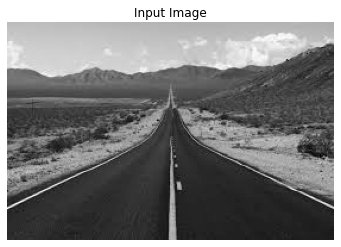

The shape of the output image is 183 x 275 pixels.


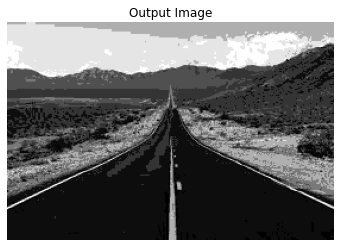

In [55]:
convert_image()

The results are in accordance with what was expected. The image seems to has lost the prior variety of its color intensities, showing higher homology of intensities in many of its regions (evident examples are the road and the sky) in comparison with the same regions before the implementation of the transformation function. Also, generally the brightness of the image has been decreased and more pixels have intensity values closer to 0 in comparison with their values in the original image.


## TASK 2
---
*Propose a method for enhancing the image “nature_dark_forest.jpg” in terms of the perceived light and color*

### Color Correction

First of all, the green channel must be modified because it's too intense.

In [56]:
original = cv2.imread('./nature_dark_forest.jpg')
original_const = original

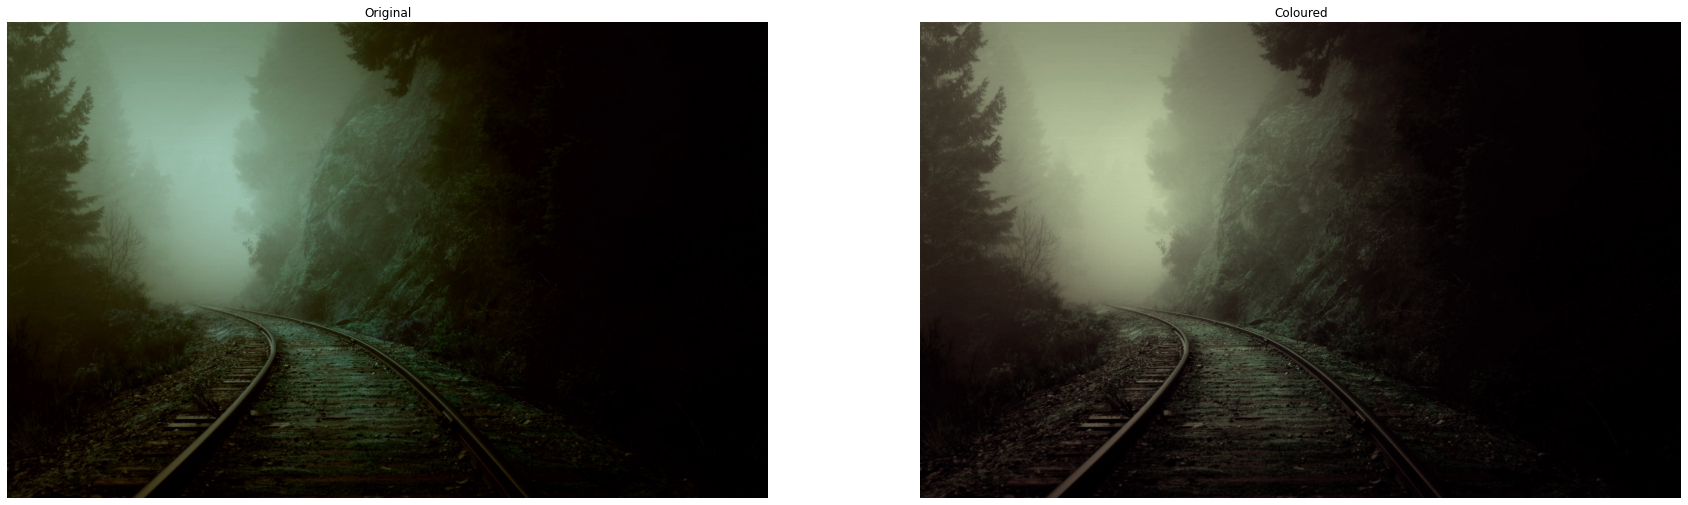

In [57]:
im = Image.open("./nature_dark_forest.jpg")
rgb2xyz = (
    0.312453, 0.257580, 0.380423, 0,
    0.212671, 0.715160, 0.172169, 0,
    0.019334, 0.19193, 0.950227, 0 )
out = im.convert("RGB", rgb2xyz)
coloured = cv2.cvtColor(np.array(out), cv2.COLOR_RGB2BGR)

fig, axes = plt.subplots(1, 3, figsize=(30,20))
plt.subplot(121), plt.imshow(original), plt.axis('off'), plt.title('Original')
plt.subplot(122), plt.imshow(coloured), plt.axis('off'), plt.title('Coloured')

plt.show()

By doing this, the image looks more realistic and the overall colouring is towards the original shades of green.  
Thus, the original image is replaced by the coloured one.

In [58]:
original = coloured

### Gamma Correction - Power Law Transform

The brightness of the image will be corrected by using a non linear transformation between the input values and the mapped output values.

If an image is under or over gamma corrected, this also affects the color balance. Over correction (in addition to making mid-tones too light) shifts colors towards neutral grey, while under correction (in addition to making mid-tones too dark) shifts colors towards the display primaries.

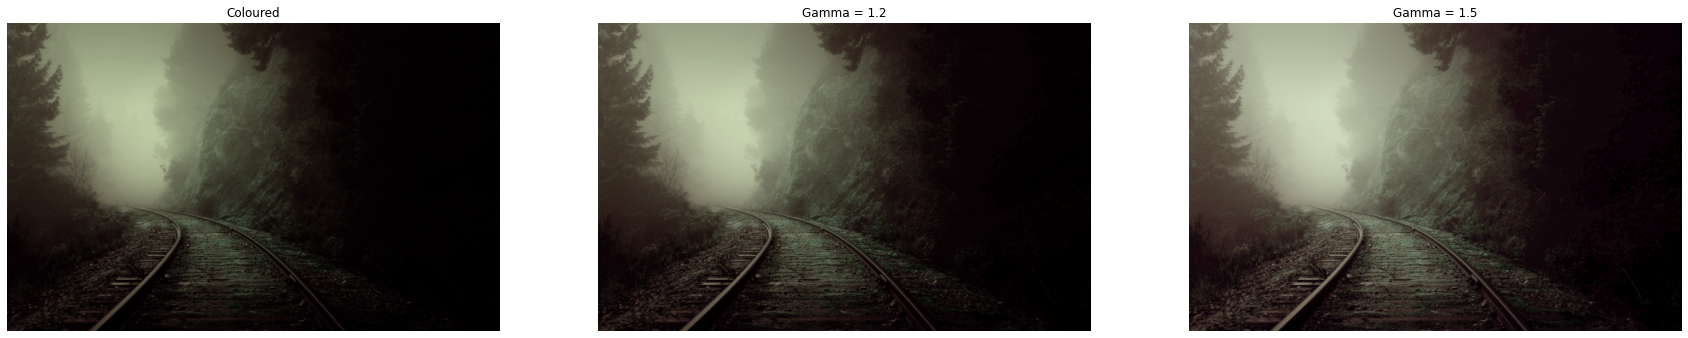

In [59]:
def adjust_gamma(image, gamma=1.0):
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")

    # apply gamma correction using the lookup table
    return cv2.LUT(image, table)

fig, axes = plt.subplots(1, 3, figsize=(30,20))
plt.subplot(131), plt.imshow(original), plt.axis('off'), plt.title('Coloured')

gamma = 1.2
adjusted = adjust_gamma(original, gamma=gamma)
plt.subplot(132), plt.imshow(adjusted), plt.axis('off'), plt.title('Gamma = 1.2')

gamma = 1.5
adjusted = adjust_gamma(original, gamma=gamma)
plt.subplot(133), plt.imshow(adjusted), plt.axis('off'), plt.title('Gamma = 1.5')

plt.show()

As we can observe from the output images of different values of gamma, if it's increased enough,   
then the colour of the image gets affected notably.

### Contrast and Brightness Adjustment

Two commonly used point processes are multiplication and addition with a constant:  
  
$g(i, j)=\alpha \cdot f(i, j)+\beta$  
  
,where i - j the coordinates of the pixel,  alpha the contrast value (1.0 - 3.0)and beta the brightness value (0 - 100). 

OpenCV already implements this as cv2.convertScaleAbs(), so only alpha and beta values are provided.

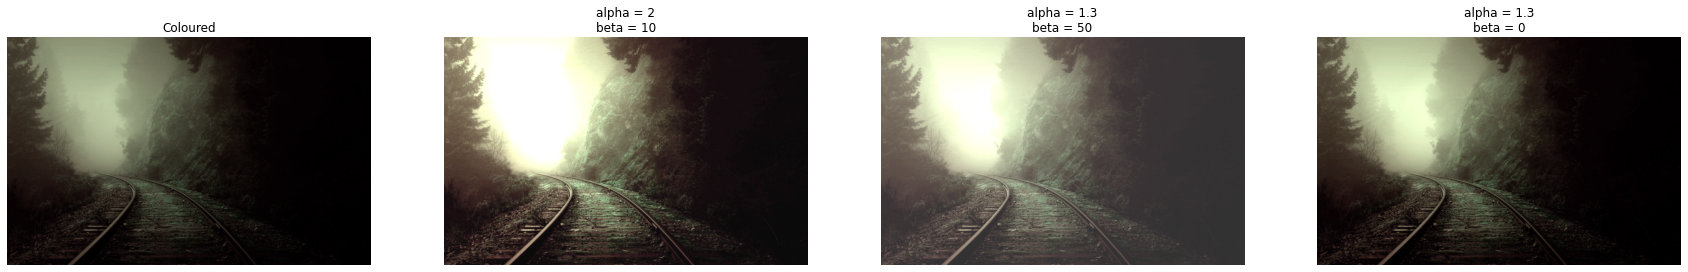

In [60]:
fig, axes = plt.subplots(1, 4, figsize=(30,20))
plt.subplot(141), plt.imshow(original), plt.axis('off'), plt.title('Coloured')

adjusted = cv2.convertScaleAbs(original, alpha=2, beta=10)
plt.subplot(142), plt.imshow(adjusted), plt.axis('off'), plt.title('alpha = 2\nbeta = 10')

adjusted = cv2.convertScaleAbs(original, alpha=1.3, beta=50)
plt.subplot(143), plt.imshow(adjusted), plt.axis('off'), plt.title('alpha = 1.3\nbeta = 50')

adjusted = cv2.convertScaleAbs(original, alpha=1.3, beta=0)
plt.subplot(144), plt.imshow(adjusted), plt.axis('off'), plt.title('alpha = 1.3\nbeta = 0')

plt.show()

### Combine the previous methods

Applying all previous techniques the following result is produced which is by far more clear and brightened.

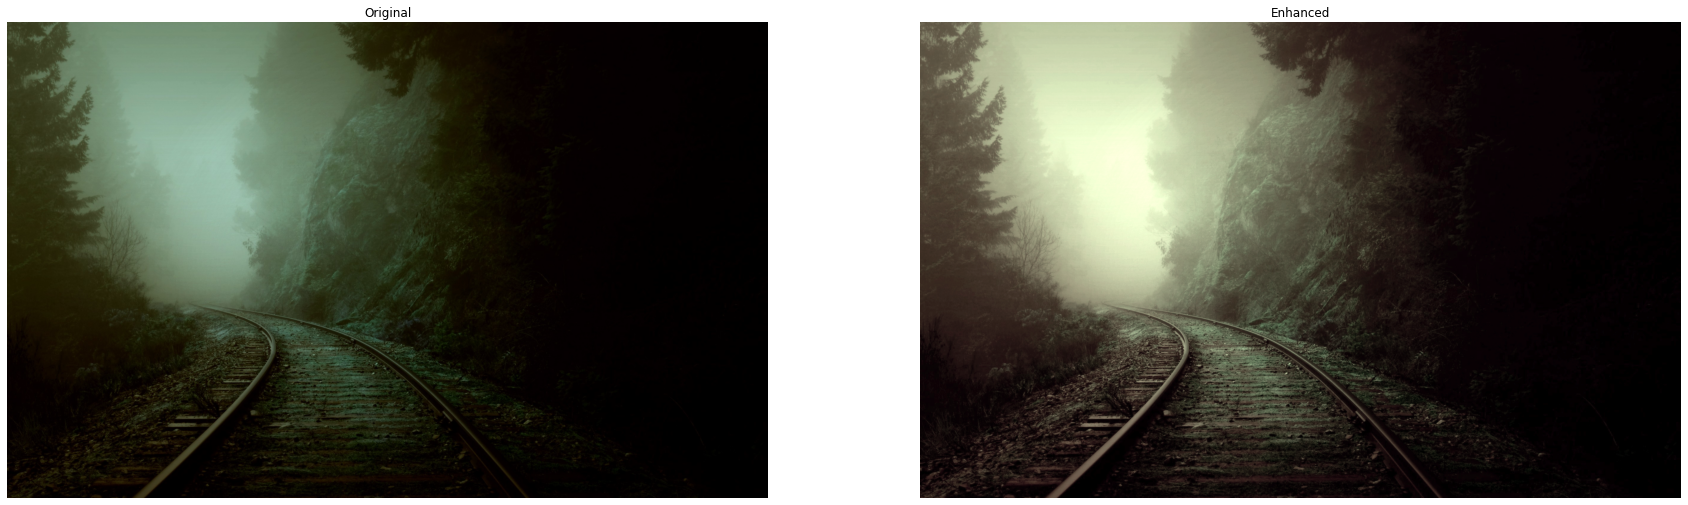

In [61]:
adjusted = adjust_gamma(original, gamma=1.1)
adjusted = cv2.convertScaleAbs(adjusted, alpha=1.3, beta=0)

fig, axes = plt.subplots(1, 3, figsize=(30,20))
plt.subplot(121), plt.imshow(original_const), plt.axis('off'), plt.title('Original')
plt.subplot(122), plt.imshow(adjusted), plt.axis('off'), plt.title('Enhanced')

plt.show()

## TASK 3

---
*Propose a method for improving the image “pollen-500x430px-96dpi.jpg” in terms the perceived brightness*  

Again, the previous procedure will be repeated with slight changes.  
This time the input image is in grayscale, so there is no need for changing the colour in terms of RGB channels.

### Contrast & Brightness

Brightness factor must be carefully changed so that small details won't be overbrightened.

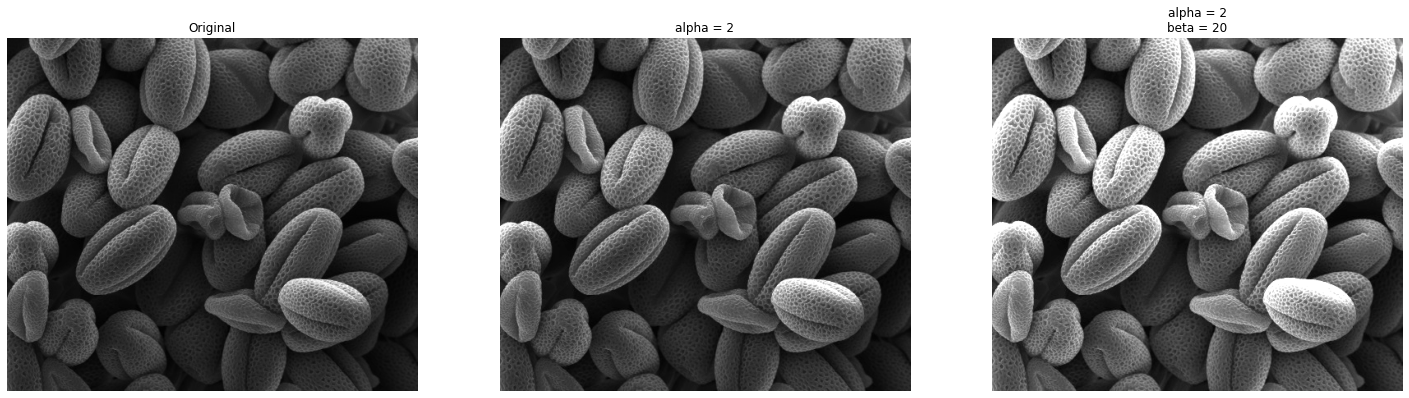

In [62]:
img = cv2.imread('./pollen-500x430px-96dpi.jpg',0) # loads in grayscale
fig, axes = plt.subplots(1, 3, figsize=(25,15))
plt.subplot(131), plt.imshow(img, cmap='gray'),plt.axis('off'), plt.title('Original')

alpha = 1.2
res = cv2.multiply(img, alpha)
plt.subplot(132), plt.imshow(res, cmap='gray'), plt.axis('off'), plt.title('alpha = 2')

beta = 80
res = cv2.add(res, beta)
plt.subplot(133), plt.imshow(res, cmap='gray'), plt.axis('off'), plt.title('alpha = 2\nbeta = 20')

plt.show()

### Gamma Correction

Of course, gamma correction makes all the difference as it lightens up the dark regions, reducing the shadows over the pollen underneath.

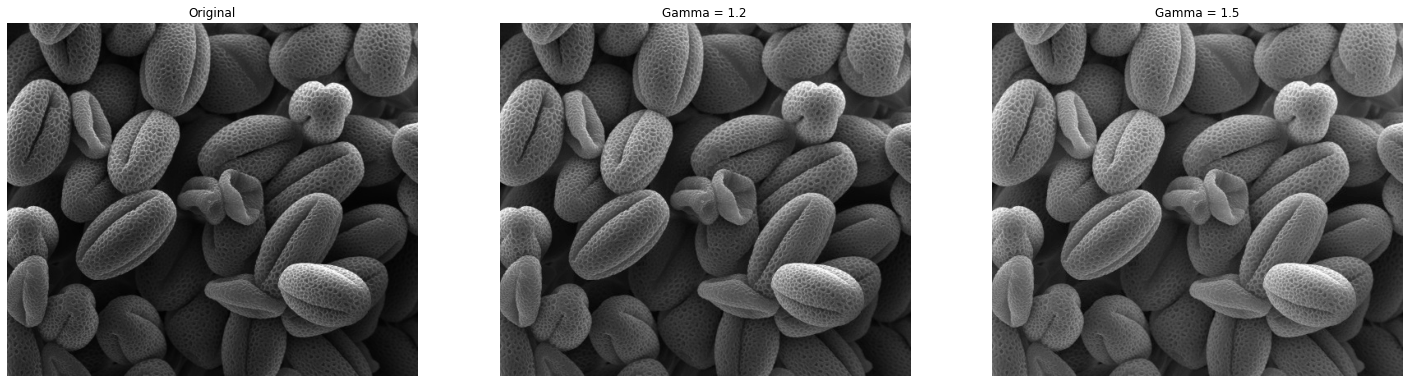

In [63]:
fig, axes = plt.subplots(1, 3, figsize=(25,15))
plt.subplot(131), plt.imshow(img, cmap='gray'), plt.axis('off'), plt.title('Original')

adjusted = adjust_gamma(img, gamma=1.2)
plt.subplot(132), plt.imshow(adjusted, cmap='gray'), plt.axis('off'), plt.title('Gamma = 1.2')

adjusted = adjust_gamma(img, gamma=1.5)
plt.subplot(133), plt.imshow(adjusted, cmap='gray'), plt.axis('off'), plt.title('Gamma = 1.5')

plt.show()

### Combine the two methods

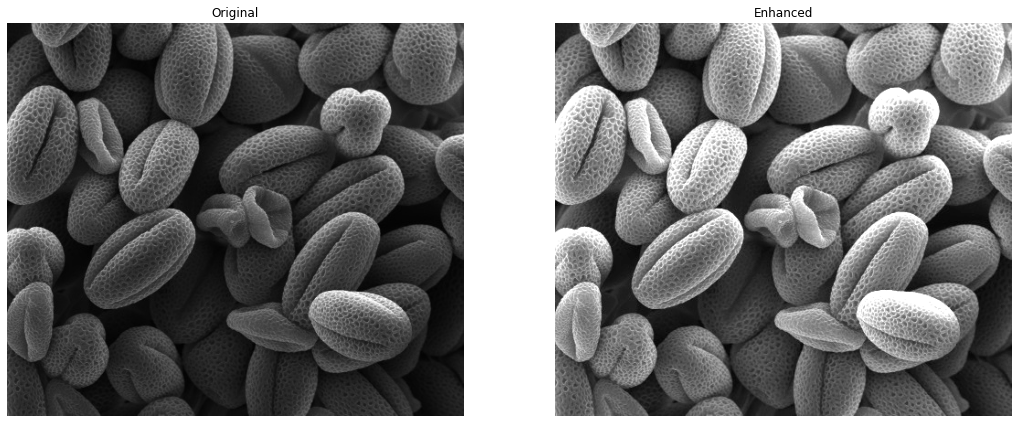

In [64]:
fig, axes = plt.subplots(1, 2, figsize=(18,8))

plt.subplot(121), plt.imshow(img, cmap='gray'), plt.axis('off'), plt.title('Original')

adjusted = adjust_gamma(res, gamma=1.5)
plt.subplot(122), plt.imshow(adjusted, cmap='gray'), plt.axis('off'), plt.title('Enhanced')

plt.show()

## Task 4
---
*Propose a method for sharpening the image “First-photo-of-the-moon-from-Chandrayaan-2_ISRO.jpg”*

Sharpening an image refers to the process of increasing the differences between dark and bright regions of pixels of the image, thus making certain edges of shapes within the image more evident. Generally it increases the contrast along the edges in the image. It can be achieved throught the implementation of high pass filters to an image. A high pass filter tends to retain the high frequency information within an image while reducing the low frequency information. Some high pass filters or methods that lead to similar results with the implementation of high pass filters are the following:
1. Laplacian or other high pass filters.
2. Removing a smoothed image (e.g. achieved through a Gaussian filter) from the original image. This is a process similar to using a high pass filter produced by the subtraction of a low pass filter from A, where A = 1 (where in this case the high pass filter is also a high boost filter). The subtraction is based on the general formula of pixel/image operators and the generated image (g(x)) is defined from the following equation: g(x) = a * src1 + b * src2 + c, where in this case src1 is the original image, src2 is the smoothed image, a has to be a positive number, b has to be a negative number and c was set equal to 0. Thus, in this case when the image is smoothed it means that the noise of the image is reduced, generally by a low pass filter, reducing very big or very low values towards the mean value of the intensity values of a neighbourhood of pixels. So when this smoothed image is subtracted by the original image, the differences of neighbouring pixels will tend to increase and be more evident especially in cases where these difference were already relatively big.

Below different images will be produced as the results of the methods described above and the one that was determined to be the best choice for the desirable result (the best possible sharpening of the image "First-photo-of-the-moon-from-Chandrayaan-2_ISRO.jpg") is mentioned in the end.

In [65]:
def sharpen_image():
    image = cv2.imread('First-photo-of-the-moon-from-Chandrayaan-2_ISRO.jpg', 0)
    image_rows = image.shape[0]
    image_columns = image.shape[1]
    print("The shape of the input image is " + str(image_rows) + " x " + str(image_columns) + " pixels.")

    display_image(image, "Original/Input Image")
    
    print("Below are the chosen results from different\nmethods for sharpening the image:")
    # Laplacian filtering: [1,-2,1], [-2,4,-2], [1,-2,1]
    kernel = np.array([[1,-2,1], [-2,4,-2], [1,-2,1]])
    new_image = cv2.filter2D(image, -1, kernel)
    display_image(new_image, "Laplace filter: [1,-2,1], [-2,4,-2], [1,-2,1]")
    
    # High pass filter: [-1,-1,-1], [-1,9,-1], [-1,-1,-1]
    kernel = (1/9)*np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    new_image = cv2.filter2D(image, -1, kernel)
    display_image(new_image, "High pass filter: [-1,-1,-1], [-1,9,-1], [-1,-1,-1]")
    
    # Image blurred by a median filter "substracted" by the original image.
    image_blurred = cv2.medianBlur(image, 51)
    new_image = cv2.addWeighted(image, 1, image_blurred, -1, 0)
    plt.imshow(new_image, cmap='gray')
    display_image(new_image, "Smoothed image by median filtering\nsubtracted from the original image.")

    # Smoothed image "subtracted" by the original image.
    smoothed = cv2.GaussianBlur(image, (0, 0), 10)
    new_image = cv2.addWeighted(image, 1.1, smoothed, -1, 0)
    display_image(new_image, "Smoothed image by Gaussian filtering\nsubtracted from the original image.")
    
    print()
    print("The final chosen method for sharpening the image is: Smoothing the original image by a Gaussian filter with kernel size computed by the standard deviation which is set equal to 10 for both X and Y directions, and subtracting the smoothed image from the original image.")
    print("The final sharpened generated image is:")
    display_image(new_image, "Smoothed image by Gaussian filtering subtracted\nfrom the original image.\nSharpened image chosen.")
    

At first, different Laplacian and non-Laplacian (high pass) filters were tested, which were the following:
1. [1,-2,1], [-2,4,-2], [1,-2,1]
2. [0,-1,0], [-1,4,-1], [0,-1,0]
3. [-1,-1,-1], [-1,8,-1], [-1,-1,-1]
4. 1/9([k_2,k_2,k_2], [k_2,k_1,k_2], [k_2,k_2,k_2]): All possible combinations of values k_1 in range [0,35) and k_2 in range [-4,+4) were tested. All these combinations generated images that seemed to have turned completely black except only for values of k_1 >= 9 with values of k_2 in range of [-3,-1].

None of the images produced by the implementation of the kernels above seemed to be the desirable result. The image produced and was at best "sharpened" from the implementation of the kernels above was chosen in order to be compared with the best sharpened images from the next methods of sharpening. In this case the chosen image was produced by the fourth type of kernel with k_1 = 9 and k_2 = -1. This image is generated below.

Also the image was blurred through the use of a median filter and then subtracted by the original image for different values of kernel sizes and the best sharpened image was again chosen. This image is generated below.

In addition, a Gaussian filter was used to smooth the image and then the produced smoothed image was subtracted from the original in order to achieve a sharpened image. Different values were tested for the size of the kernel and for the standard deviation. The best image was produced in the case where the kernel size was computed by the standard deviation as set equal to 10 for both X and Y directions. The corresponding image was chosen in this case. This image is generated below.

At the end the chosen images from each method were compared between them and that is how the final selection came up to be the image produced by the subtraction of the smoothed image generated by the Gaussian filter with its kernel size computed by the standard deviation which was set equal to 10 for both X and Y directions, from the original image. Specifically, for the subtraction the following values for the a, b and c variables were chosen, a = 1.1, b = -1 and g = 0 (after testing different values for these variables).


The shape of the input image is 800 x 1200 pixels.


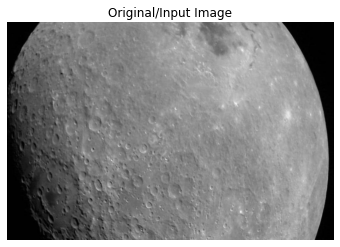

Below are the chosen results from different
methods for sharpening the image:


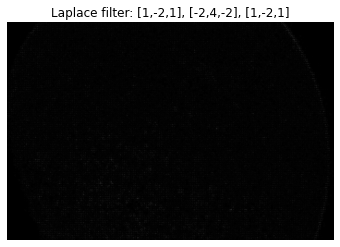

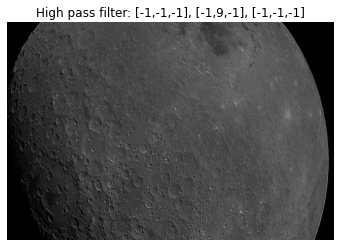

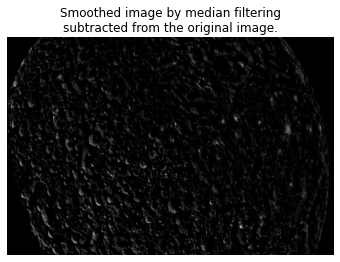

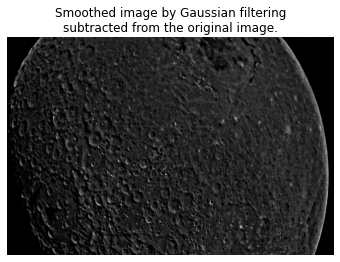


The final chosen method for sharpening the image is: Smoothing the original image by a Gaussian filter with kernel size computed by the standard deviation which is set equal to 10 for both X and Y directions, and subtracting the smoothed image from the original image.
The final sharpened generated image is:


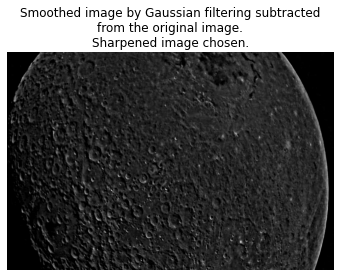

In [66]:
sharpen_image()

So, it is evident from the generated images above that the best choice for the sharpening of the original image consists the generation of a smoothed image by a Gaussian filter with its kernel size computed by a standard deviation set equal to 10 for both X and Y directions and then its subtraction from the original image (with a = 1.1, b = -1 and c = 0). So, after the sharpening of the image has been achieved more edges of shapes within the image are more obvious. Basically information which previously was not perceived (by the eye) due to adjacent pixels having small differences regarding their intensity values, now is more easily perceived because these differenes have been increased.


## Task 5
---
*Propose one combined spatial enhancement methods (e.g. arithmetic operations, gray level 
transformations, and/or sharpening spatial filters) to convert “image_1” to “image_2”.*

### a)
*Try to guess the processing steps she adopted. (Note the dynamic range and brightness of 
the enhanced image, and the noise introduced.)*

Based on the original and final image it is obvious that the latter image is a complement of the original image, thus the complement of the original image should be generated. Also at the final image the edges of the shapes (e.g. bones) in the image are more evident, meaning that probably a filter has been implemented to sharpen the image. In addition modifying the gamma correction which can light up dark regions of the image and possibly changing the contrast and brightness of the image will also lead to an output closer to the final image.

After implementing the filter in different stages of the process, it was determined that beginning with the implementation of the filter leads to the most similar result to the final image. Also, different types of filters were used and finally the following one was selected: [-1,-1,-1], [-1,9,-1], [-1,-1,-1]. In addition, different values were tested for the contrast, brightness and gamma corrections of the image in order to achieve the best result. The final proposed pipeline is the following:
1. Sharpening (filter = [-1,-1,-1], [-1,9,-1], [-1,-1,-1])
2. Complement
3. Contrast (alpha = 1.7)
4. Brightness (beta = 80)
5. Gamma (gamma = 3)


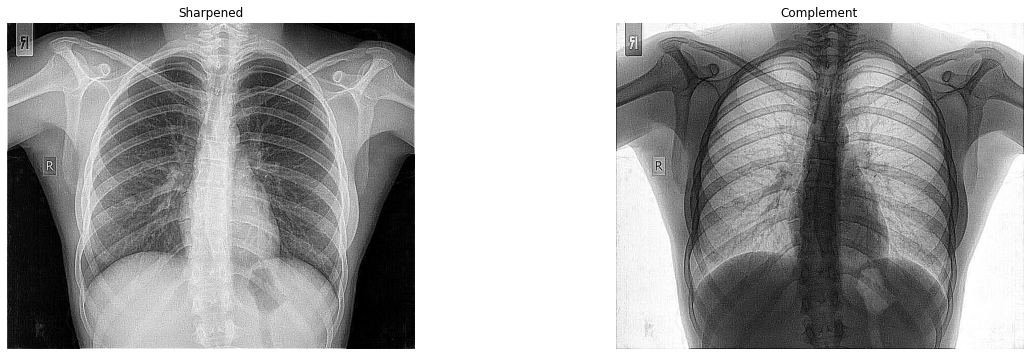

In [67]:
img = cv2.imread('./image_1.jpg',0) # loads in grayscale
original = img

# Sharpening
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
img = cv2.filter2D(img, -1, kernel, borderType=cv2.BORDER_CONSTANT)

# Complement
res = (255-img)

fig, axes = plt.subplots(1, 3, figsize=(20,6))
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.axis('off'), plt.title('Sharpened')
plt.subplot(122), plt.imshow(res, cmap='gray'), plt.axis('off'), plt.title('Complement')
plt.show()

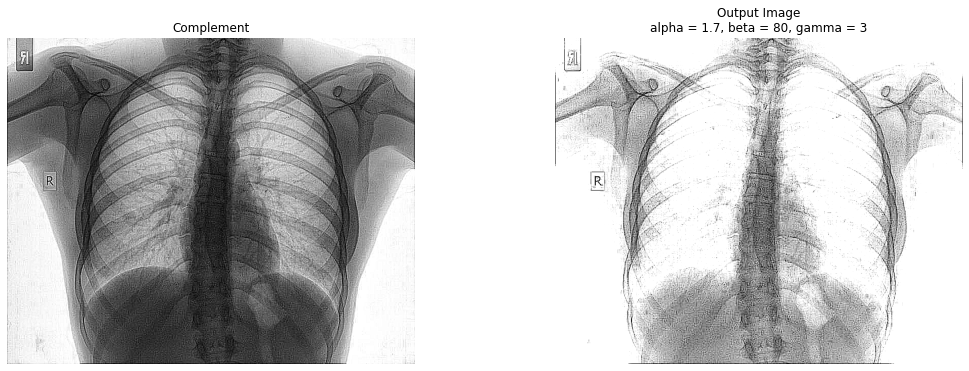

In [68]:
fig, axes = plt.subplots(1, 2, figsize=(18,6))
plt.subplot(121), plt.imshow(res, cmap='gray'), plt.axis('off'), plt.title('Complement')

# Contrast
alpha = 1.7
res = cv2.multiply(res, alpha)
# Brightness
beta = 70
res = cv2.add(res, beta)
# Gamma
res = adjust_gamma(res, gamma=3)

plt.subplot(122), plt.imshow(res, cmap='gray'), plt.axis('off'), plt.title('Output Image\nalpha = 1.7, beta = 80, gamma = 3')
plt.show()


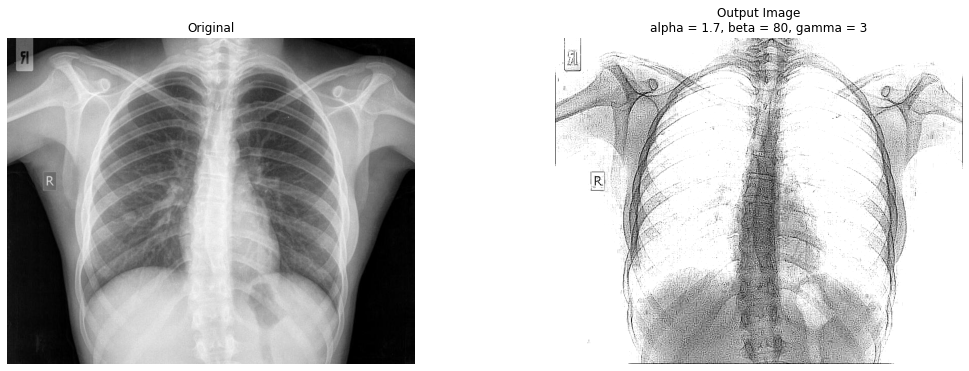

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(18,6))

plt.subplot(121), plt.imshow(original, cmap='gray'),plt.axis('off'), plt.title('Original')
plt.subplot(122), plt.imshow(res, cmap='gray'), plt.axis('off'), plt.title('Output Image\nalpha = 1.7, beta = 80, gamma = 3')
plt.show()

### b) 
*Propose a pipeline of processes with the aim of approximating “image_1” starting from 
“image_2”*

Regarding the reverse engineering of the previous process, it is clear that the original image (image_1) can't be retrieved with increased accuracy from image_2. That derives from the absence of pixel information of the process before.
Nevertheless, the following steps were used to approach the reverse pipeline:

1. Unsharpening
2. Complement
4. Brightness
5. Gamma Correction

About unsharpening, using a low pass filter tends to retain the low frequency information within an image but it can't produce the desired pixel information out of nowhere.

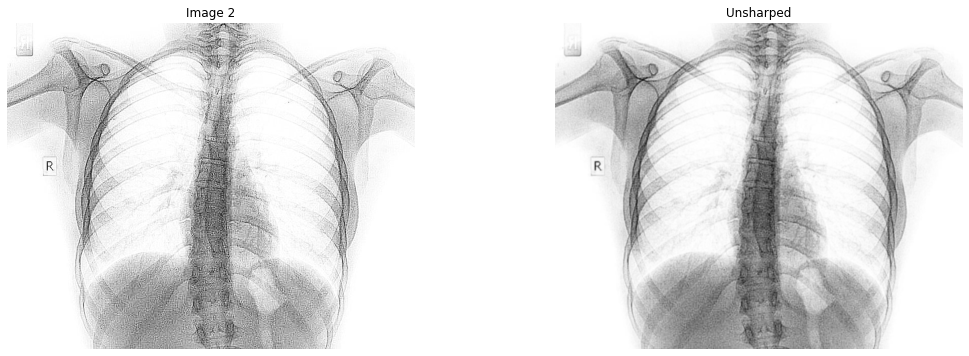

In [70]:
inv_img = cv2.imread('./image_2.jpg',0) # loads in grayscale

# Unsharpening
img = cv2.GaussianBlur(inv_img,(5,5),0)

fig, axes = plt.subplots(1, 2, figsize=(18,6))
plt.subplot(121), plt.imshow(inv_img, cmap='gray'), plt.axis('off'), plt.title('Image 2')
plt.subplot(122), plt.imshow(img, cmap='gray'), plt.axis('off'), plt.title('Unsharped')
plt.show()

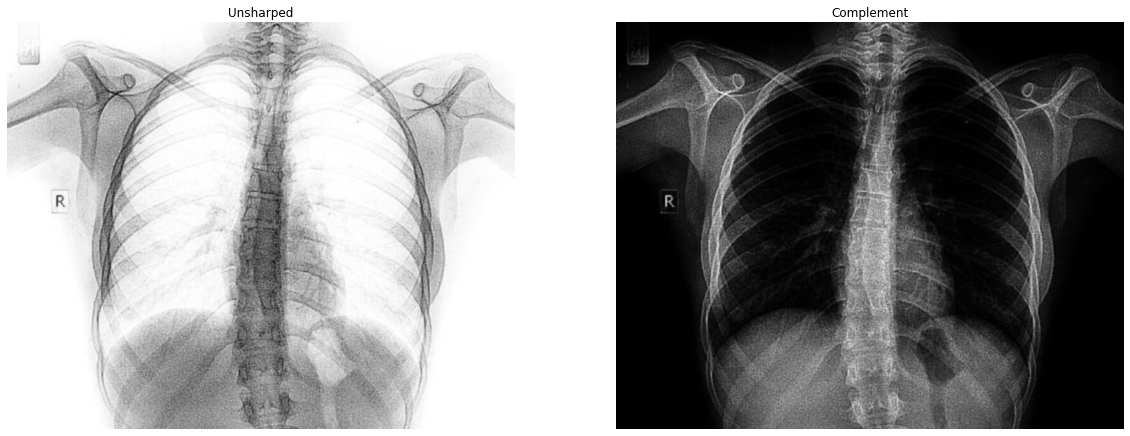

In [71]:
inv_img = img
# Complement
res = (255-inv_img)

fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.subplot(121), plt.imshow(inv_img, cmap='gray'), plt.axis('off'), plt.title('Unsharped')
plt.subplot(122), plt.imshow(res, cmap='gray'), plt.axis('off'), plt.title('Complement')
plt.show()

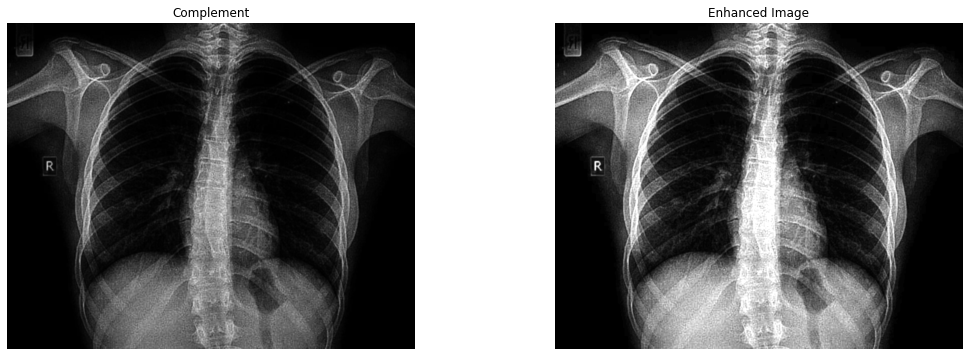

In [72]:
#Brightness
beta = 110
temp = cv2.add(res, beta)
# Gamma Correction
temp = adjust_gamma(temp, gamma=3)

fig, axes = plt.subplots(1, 2, figsize=(18,6))
plt.subplot(121), plt.imshow(res, cmap='gray'),plt.axis('off'), plt.title('Complement')
plt.subplot(122), plt.imshow(temp, cmap='gray'), plt.axis('off'), plt.title('Enhanced Image')
plt.show()